<a href="https://colab.research.google.com/github/Jang-KyungWuk/Arknights_W_Headhunting_Analysis/blob/main/W_Headhunting_Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
base_dir="/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [2]:
import random as rd
import pandas as pd
import numpy as np
import datetime
import time
rd.seed('20201230')
KR_doctor_count=2321646 # From KR 1st anniversary broadcast
KST=datetime.timezone(datetime.timedelta(hours=9))

In [3]:
res_array=np.zeros((KR_doctor_count,11),dtype=int)

In [4]:
class doctor:
  def __init__(self,n):
    self.pull_count=0
    self.W_count=0
    self.Weedy_count=0
    self.S6_count=0
    self.Elysium_count=0
    self.S5_count=0
    self.S4_count=0
    self.S3_count=0
    self.stack=0

    self.W=0.007 # 0.02*0.7*0.5
    self.Weedy=0.014 # W+(0.02*0.7*0.5)
    self.S6=0.02 # W+Weedy+(0.02*0.3)
    self.Elysium=0.06 # S6+(0.08*0.5)
    self.S5=0.1
    self.S4=0.6   

    self.dr_no=n

  def single_pull(self):
    pull=rd.random()

    if (self.pull_count==9) and ((self.S4_count+self.S3_count)==9):
      if (pull<=self.W):
        self.W_count+=1
        self.stack=-1
      elif (pull<=self.Weedy):
        self.Weedy_count+=1
        self.stack=-1
      elif (pull<=self.S6):
        self.S6_count+=1
        self.stack=-1
      elif (pull<=0.51):
        self.Elysium_count+=1
      else:
        self.S5_count+=1
      self.stack+=1
      self.pull_count+=1

    elif self.stack<=50:
      if (pull<=self.W):
        self.W_count+=1
        self.stack=-1
      elif (pull<=self.Weedy):
        self.Weedy_count+=1
        self.stack=-1
      elif (pull<=self.S6):
        self.S6_count+=1
        self.stack=-1
      elif (pull<=self.Elysium):
        self.Elysium_count+=1
      elif (pull<=self.S5):
        self.S5_count+=1
      elif (pull<=self.S4):
        self.S4_count+=1
      else:
        self.S3_count+=1
      self.stack+=1
      self.pull_count+=1

    else:
      bonus=self.stack-50

      bonus_W=self.W+(0.007*bonus)
      bonus_Weedy=self.Weedy+(0.014*bonus)
      bonus_S6=self.S6+(0.02*bonus)
      bonus_Elysium=self.Elysium+((0.02-((1/6)*0.02))*bonus)
      bonus_S5=self.S5+((0.02-((1/3)*0.02))*bonus)
      bonus_S4=self.S4+((0.02-((2/3)*0.02))*bonus)
     
      '''
      print("bonus stack : ",bonus)
      print(bonus_W)
      print(bonus_Weedy)
      print(bonus_S6)
      print(bonus_Elysium)
      print(bonus_S5)
      print(bonus_S4)
      print("<<<<<<>>>>>>")
      '''

      if (pull<=bonus_W):
        self.W_count+=1
        self.stack=-1
      elif (pull<=bonus_Weedy):
        self.Weedy_count+=1
        self.stack=-1
      elif (pull<=bonus_S6):
        self.S6_count+=1
        self.stack=-1
      elif (pull<=bonus_Elysium):
        self.Elysium_count+=1
      elif (pull<=bonus_S5):
        self.S5_count+=1
      elif (pull<=bonus_S4):
        self.S4_count+=1
      else:
        self.S3_count+=1
      self.stack+=1
      self.pull_count+=1   

  def row_pull(self):
    for n in range(10):
      self.single_pull()

  def pull_for_W(self):
    while self.W_count<1 and self.pull_count<300:
      self.single_pull()

  def print_result(self):
    print("Pull_count :",self.pull_count)
    print("W_count :",self.W_count)
    print("Weedy_count :",self.Weedy_count)
    print("S6_count :",self.S6_count)
    print("Elysium_count :",self.Elysium_count)
    print("S5_count :",self.S5_count)
    print("S4_count :",self.S4_count)
    print("S3_count :",self.S3_count)
    print("-------------------------------------")

  def return_result(self):
    return(self.dr_no,
           self.pull_count, self.W_count, self.Weedy_count, self.S6_count,
           self.Elysium_count, self.S5_count,
           (self.W_count+self.Weedy_count+self.S6_count),
           (self.Elysium_count+self.S5_count),
           self.S4_count,self.S3_count)


In [5]:
for n in range (KR_doctor_count):
  dr=doctor(n)
  dr.pull_for_W()
  res_array[n]+=dr.return_result()

In [6]:
res_array

array([[      0,      56,       1, ...,       5,      21,      29],
       [      1,      21,       1, ...,       1,      10,       7],
       [      2,      26,       1, ...,       3,      14,       8],
       ...,
       [2321643,      75,       1, ...,       5,      43,      25],
       [2321644,      10,       1, ...,       1,       4,       4],
       [2321645,     120,       1, ...,       6,      56,      54]])

In [7]:
dataframe=pd.DataFrame(data=res_array,columns=['DR no','Pulls','W','Weedy','Non Pick-up S6 OP','Elysium','Non Pick-up S5 OP','S6 OP','S5 OP','S4 OP','S3 OP'])

In [8]:
dataframe

,DR no,Pulls,W,Weedy,Non Pick-up S6 OP,Elysium,Non Pick-up S5 OP,S6 OP,S5 OP,S4 OP,S3 OP
0,0,56,1,0,0,3,2,1,5,21,29
1,1,21,1,0,2,1,0,3,1,10,7
2,2,26,1,0,0,1,2,1,3,14,8
3,3,33,1,0,0,1,2,1,3,17,12
4,4,300,0,2,6,16,9,8,25,146,121
...,...,...,...,...,...,...,...,...,...,...,...
2321641,2321641,135,1,2,0,8,3,3,11,72,49
2321642,2321642,46,1,0,0,1,2,1,3,22,20
2321643,2321643,75,1,1,0,2,3,2,5,43,25
2321644,2321644,10,1,0,0,0,1,1,1,4,4


In [9]:
simmed_dr_count=len(dataframe)

In [ ]:
#dataframe.to_excel(base_dir+("W sim 3 res %s.xlsx")%simmed_dr_count,index=False)

'''
ValueError                                Traceback (most recent call last)
<ipython-input-10-cacd56f60337> in <module>()
----> 1 dataframe.to_excel(base_dir+("W sim 2 res %s.xlsx")%simmed_dr_count,index=False)

1 frames
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/excel.py in write(self, writer, sheet_name, startrow, startcol, freeze_panes, engine)
    721         if num_rows > self.max_rows or num_cols > self.max_cols:
    722             raise ValueError(
--> 723                 f"This sheet is too large! Your sheet size is: {num_rows}, {num_cols} "
    724                 f"Max sheet size is: {self.max_rows}, {self.max_cols}"
    725             )

ValueError: This sheet is too large! Your sheet size is: 2321646, 11 Max sheet size is: 1048576, 16384
'''

In [11]:
dataframe.to_csv(base_dir+("W sim 3 res %s.csv")%simmed_dr_count,index=False)

In [12]:
pull_data=pd.DataFrame(dataframe['Pulls'])
pull_hist=pull_data.groupby('Pulls')['Pulls'].agg('count').pipe(pd.DataFrame).rename(columns={'Pulls':'Frequency'})

In [13]:
pull_hist['PDF']=pull_hist['Frequency']/sum(pull_hist['Frequency'])

pull_hist['CDF']=pull_hist['PDF'].cumsum()
pull_hist=pull_hist.reset_index()

pull_hist

,Pulls,Frequency,PDF,CDF
0,1,16574,0.007139,0.007139
1,2,15991,0.006888,0.014027
2,3,15959,0.006874,0.020901
3,4,15690,0.006758,0.027659
4,5,15803,0.006807,0.034466
...,...,...,...,...
295,296,1037,0.000447,0.961433
296,297,1044,0.000450,0.961883
297,298,993,0.000428,0.962311
298,299,1013,0.000436,0.962747


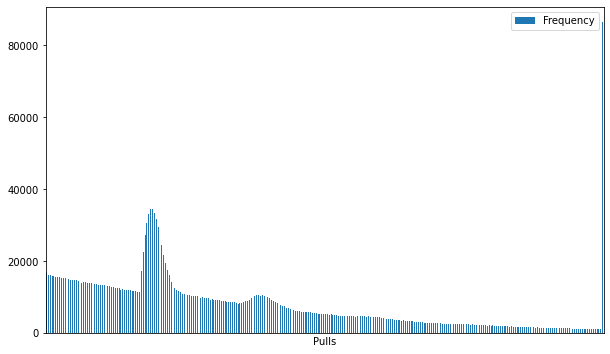

In [14]:
plot=pull_hist.plot.bar(x='Pulls', y=['Frequency'], grid=False, xticks=[],figsize=(10,6))
fig=plot.get_figure()
fig.savefig(base_dir+("W sim 3 freq bar %s.png")%simmed_dr_count)

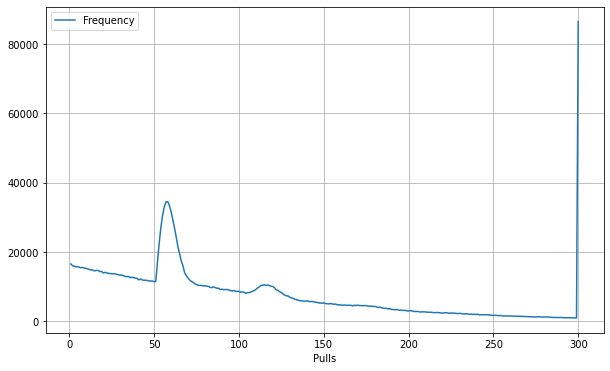

In [15]:
plot=pull_hist.sort_values('Pulls').plot(x='Pulls',y='Frequency',grid=True, figsize=(10,6))
fig=plot.get_figure()
fig.savefig(base_dir+("W sim 3 freq %s.png")%simmed_dr_count)

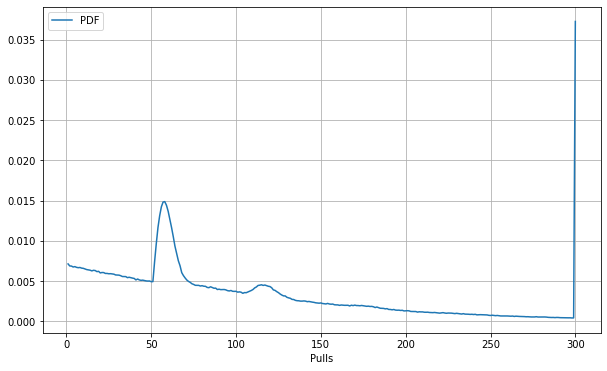

In [16]:
plot=pull_hist.sort_values('Pulls').plot(x='Pulls',y='PDF',grid=True, figsize=(10,6))
fig=plot.get_figure()
fig.savefig(base_dir+("W sim 3 PDF %s.png")%simmed_dr_count)

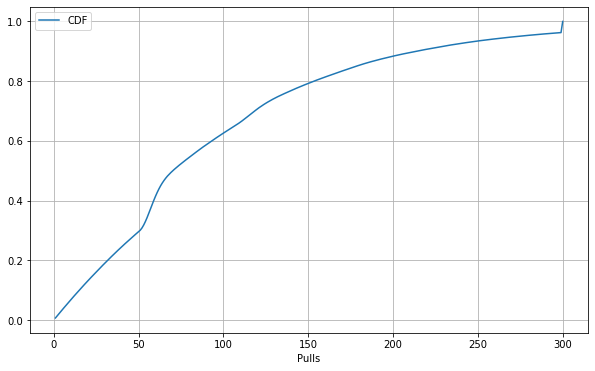

In [17]:
plot=pull_hist.sort_values('Pulls').plot(x='Pulls',y='CDF',grid=True, figsize=(10,6))
fig=plot.get_figure()
fig.savefig(base_dir+("W sim 3 CDF %s.png")%simmed_dr_count)

In [18]:
dataframe.mean()

DR no                1.160822e+06
Pulls                9.645792e+01
W                    9.631735e-01
Weedy                9.623590e-01
Non Pick-up S6 OP    8.253166e-01
Elysium              3.900630e+00
Non Pick-up S5 OP    3.900198e+00
S6 OP                2.750849e+00
S5 OP                7.800828e+00
S4 OP                4.775394e+01
S3 OP                3.815230e+01
dtype: float64

In [19]:
pull_hist['Frequency'][299]

86488

In [20]:
pull_hist['Frequency'][0:299].sum()

2235158

In [21]:
dataframe[2:8]

,DR no,Pulls,W,Weedy,Non Pick-up S6 OP,Elysium,Non Pick-up S5 OP,S6 OP,S5 OP,S4 OP,S3 OP
2,2,26,1,0,0,1,2,1,3,14,8
3,3,33,1,0,0,1,2,1,3,17,12
4,4,300,0,2,6,16,9,8,25,146,121
5,5,1,1,0,0,0,0,1,0,0,0
6,6,75,1,0,1,4,4,2,8,47,18
7,7,118,1,3,0,7,7,4,14,52,48
